#MODELO CATBOOST



#PRÉ PROCESSAMENTO

In [ ]:
!pip install catboost
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.6 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

# Carregando o arquivo para um DataFrame
import pandas as pd
df = pd.read_stata('data8.dta')

Saving data8.dta to data8.dta


In [ ]:
# Visualizar as primeiras linhas do DataFrame
print(df.head())

# Verificar informações gerais dos dados
print(df.info())



   TEMPODESLOC  TEMPOTOTAL  TEMPOEDFIS  TEMPOEXTRA  TEMPOEST       sexo  \
0          0.0        15.0         0.0        15.0      60.0   Feminino   
1        120.0       510.0       260.0       130.0     300.0   Feminino   
2          0.0       585.0       130.0       455.0     420.0  Masculino   
3          0.0         0.0         0.0         0.0       0.0  Masculino   
4         30.0       165.0        90.0        45.0      60.0  Masculino   

  corpele    idade trabalha         cafedamanha  ...   bullying  \
0  Branca  13 anos      Não  Sim, todos os dias  ...      Nunca   
1  Branca  14 anos      Não           Raramente  ...      Nunca   
2   Parda  13 anos      Não           Raramente  ...  Raramente   
3  Branca  14 anos      Não  Sim, todos os dias  ...      Nunca   
4  Branca  13 anos      Não  Sim, todos os dias  ...  Raramente   

         motivo_bullying                  sozinho                  insonia  \
0                    NaN                    Nunca                   

In [ ]:
# Verificando se há dados nulos
print(df.isnull().sum())

TEMPODESLOC            33
TEMPOTOTAL             20
TEMPOEDFIS             84
TEMPOEXTRA             93
TEMPOEST              110
sexo                    0
corpele                23
idade                   0
trabalha               14
cafedamanha            12
almojanta              25
comer_tvestuda         15
merenda              1135
comemerenda          5445
feijao_7               36
salgado_7              37
legumeverdura_7        34
guloseima_7            39
frutas_7               37
refrigerante_7         29
aup_7                  50
fastfood_7             37
ficoucfome             30
frutas_30              46
legumeverdura_30       59
refrigerante_30        40
tempo_tv               50
tempo_telas            84
tabagismo            4729
alcool               4743
drogas               4741
bullying              103
motivo_bullying      9329
sozinho                66
insonia                77
amigos                 67
imagem_imp            155
satisf_corp           181
imagem_corp 

In [ ]:
#quintil como categoria
df['quintil_socioecon'] = df['quintil_socioecon'].astype('category')

In [ ]:
# PAra identificar colunas categóricas e contínuas
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
continuous_cols = df.select_dtypes(include=['float64']).columns

In [ ]:
# Tratamento dos valores nulos
# Para variáveis contínuas: substituir nulos pela mediana
!pip install scikit-learn
from sklearn.impute import SimpleImputer
imputer_cont = SimpleImputer(strategy='median')
df[continuous_cols] = imputer_cont.fit_transform(df[continuous_cols])

In [ ]:
# Para variáveis categóricas: substituir nulos pela moda
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

In [ ]:
from scipy import stats
import pandas as pd

features = ['TEMPODESLOC', 'TEMPOTOTAL', 'TEMPOEDFIS', 'TEMPOEXTRA', 'TEMPOEST']

# Calculando o Z-Score para múltiplas colunas
for feature in features:
    df[f'z_score_{feature}'] = stats.zscore(df[feature])

# Identificando outliers para todas as colunas
outliers_list = []  # Use a list to store outlier DataFrames
for feature in features:
    outliers_list.append(df[df[f'z_score_{feature}'].abs() > 3])

# concatenar outiliers para DataFrame
outliers = pd.concat(outliers_list, axis=0)

In [ ]:
outliers = outliers.drop_duplicates()

In [ ]:
# Codificação de variáveis categóricas
# OneHotEncoder para variáveis categóricas
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first')
transformed_df = ohe.fit_transform(df[categorical_cols])
ohe_df = pd.DataFrame(transformed_df, columns=[f"{col}_{cat}" for col, categories in zip(categorical_cols, ohe.categories_) for cat in categories[1:]])
df = pd.concat([df.drop(categorical_cols, axis=1), ohe_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.head()

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,sexo_Masculino,corpele_Branca,corpele_Indígena,corpele_Parda,corpele_Preta,...,imc_cat_recoded_Sobrepeso e Obesidade,quintil_socioecon_2.0,quintil_socioecon_3.0,quintil_socioecon_4.0,quintil_socioecon_5.0,z_score_TEMPODESLOC,z_score_TEMPOTOTAL,z_score_TEMPOEDFIS,z_score_TEMPOEXTRA,z_score_TEMPOEST
0,-0.662734,-1.077921,-0.798740,-0.702443,-0.523275,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.662734,-1.077921,-0.798740,-0.702443,-0.523275
1,0.391249,1.276770,3.402980,0.089315,1.205331,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.391249,1.276770,3.402980,0.089315,1.205331
2,-0.662734,1.633541,1.302120,2.326892,2.069635,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.662734,1.633541,1.302120,2.326892,2.069635
3,-0.662734,-1.149275,-0.798740,-0.805716,-0.955427,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.662734,-1.149275,-0.798740,-0.805716,-0.955427
4,-0.399238,-0.364378,0.655701,-0.495898,-0.523275,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.399238,-0.364378,0.655701,-0.495898,-0.523275


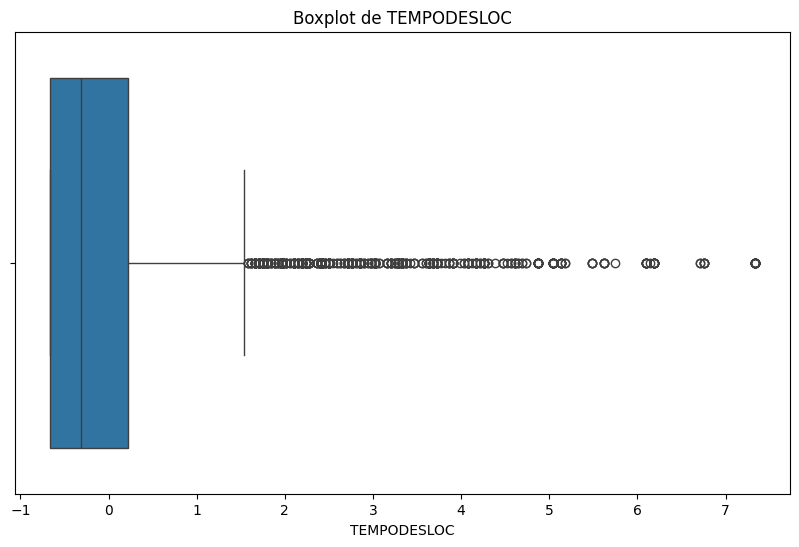

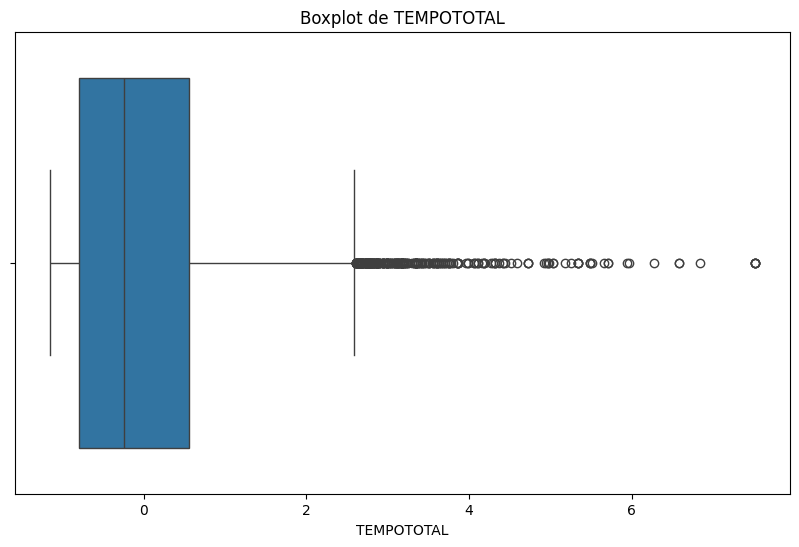

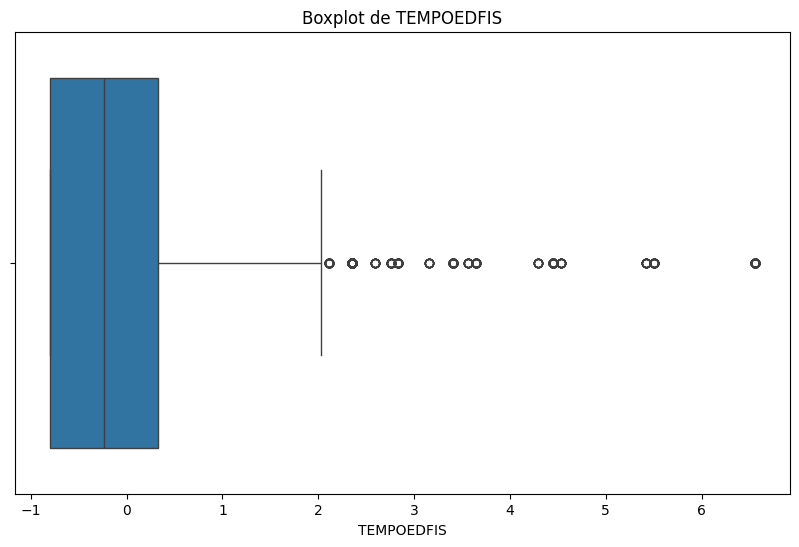

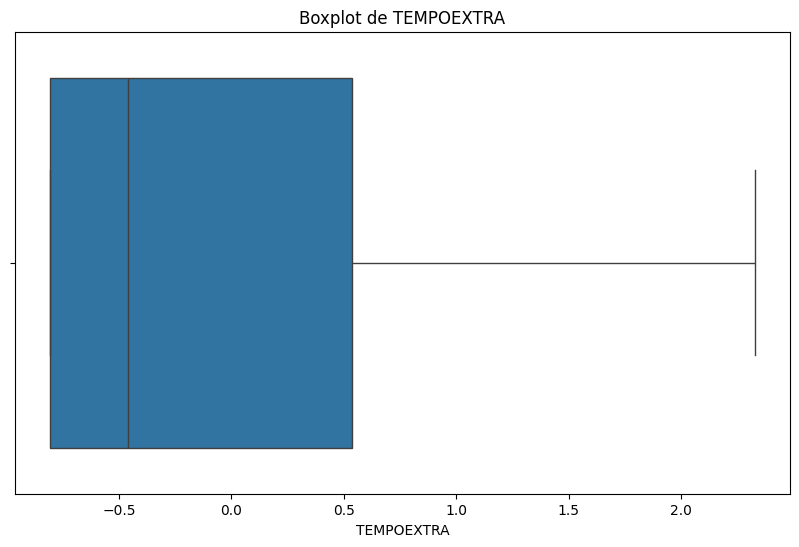

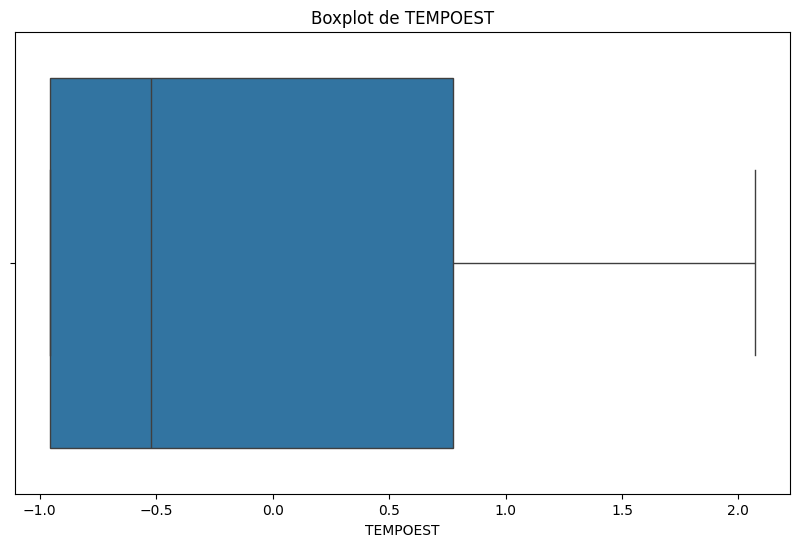

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# múltiplas colunas
features = ['TEMPODESLOC', 'TEMPOTOTAL', 'TEMPOEDFIS', 'TEMPOEXTRA', 'TEMPOEST']

# boxplots para cada coluna
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')
    plt.show()

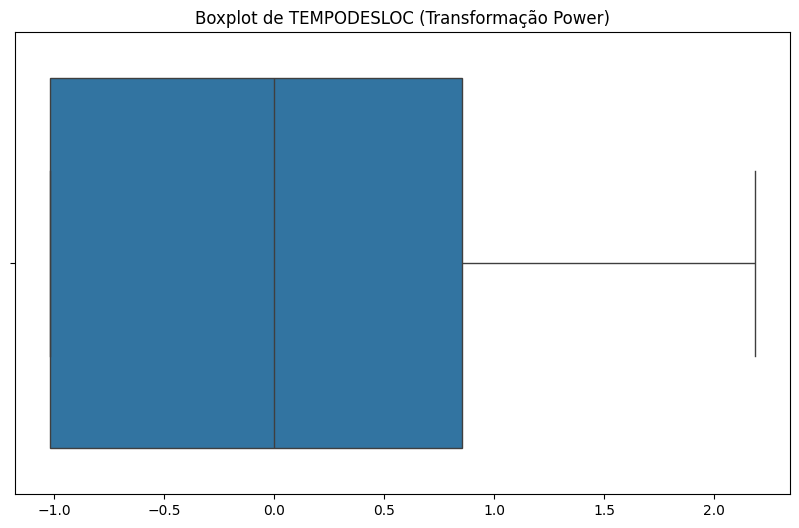

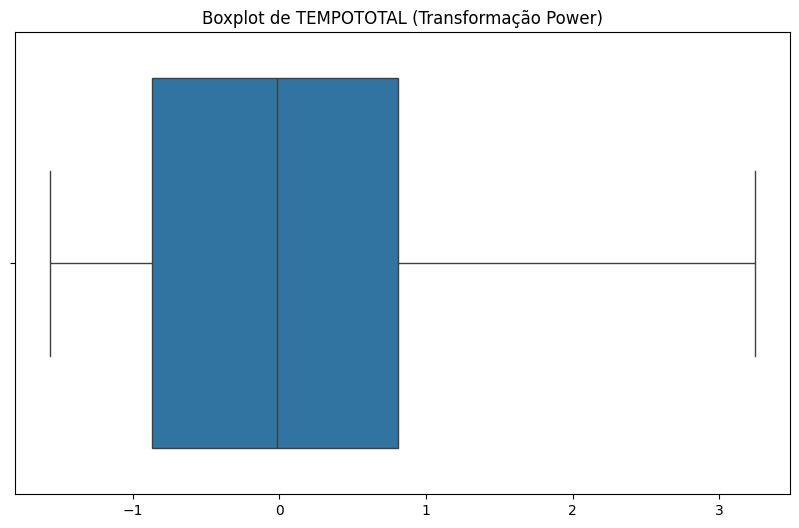

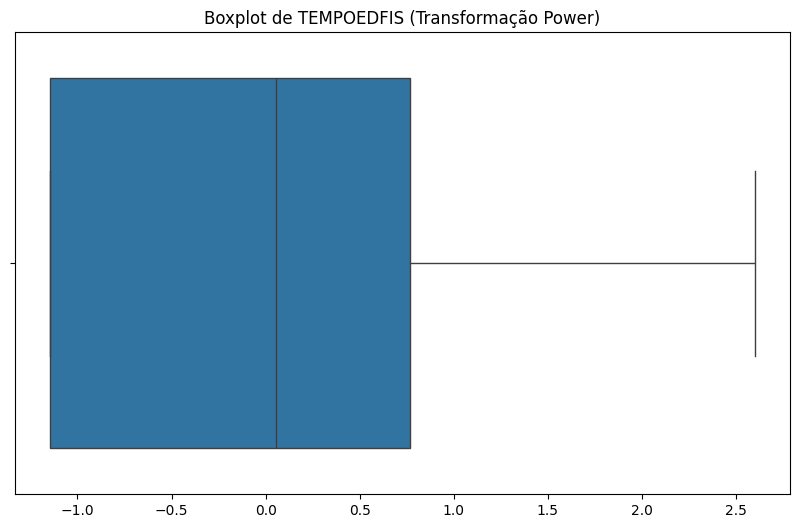

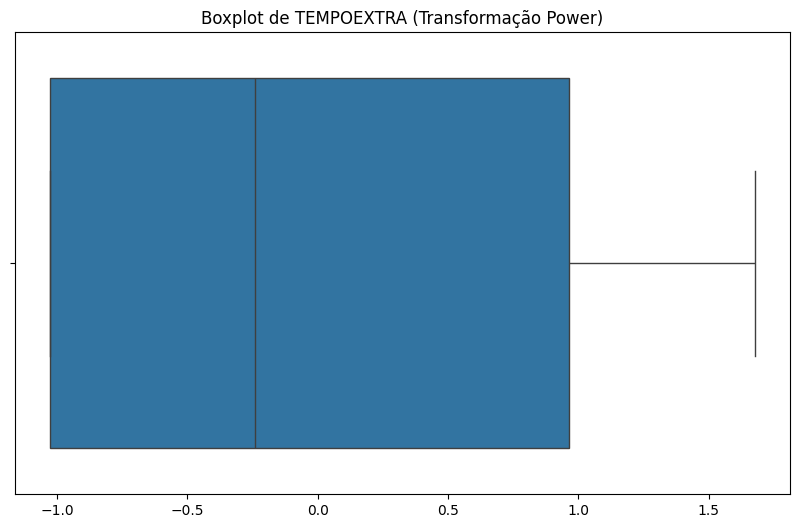

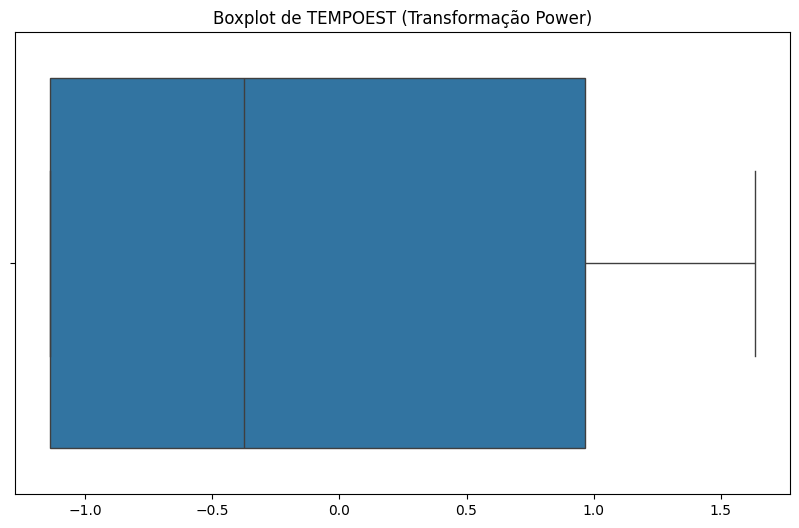

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Aplicando a transformação Power (Box-Cox ou Yeo-Johnson) e criando boxplots para cada coluna
pt = PowerTransformer(method='yeo-johnson')  # 'box-cox' se os dados forem estritamente positivos

for feature in features:
    plt.figure(figsize=(10, 6))

    # A transformação Power é aplicada à coluna
    transformed_data = pt.fit_transform(df[[feature]])

    sns.boxplot(x=transformed_data.flatten())
    plt.title(f'Boxplot de {feature} (Transformação Power)')
    plt.show()

In [ ]:
df.head()

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,sexo_Masculino,corpele_Branca,corpele_Indígena,corpele_Parda,corpele_Preta,...,satisf_corp_Satisfeito,imagem_corp_Magro,imagem_corp_Muito gordo,imagem_corp_Muito magro,imagem_corp_Normal,imc_cat_recoded_Sobrepeso e Obesidade,quintil_socioecon_2.0,quintil_socioecon_3.0,quintil_socioecon_4.0,quintil_socioecon_5.0
0,-0.662734,-1.077921,-0.798740,-0.702443,-0.523275,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.391249,1.276770,3.402980,0.089315,1.205331,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.662734,1.633541,1.302120,2.326892,2.069635,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.662734,-1.149275,-0.798740,-0.805716,-0.955427,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,-0.399238,-0.364378,0.655701,-0.495898,-0.523275,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df.head()

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,sexo_Masculino,corpele_Branca,corpele_Indígena,corpele_Parda,corpele_Preta,...,satisf_corp_Satisfeito,imagem_corp_Magro,imagem_corp_Muito gordo,imagem_corp_Muito magro,imagem_corp_Normal,imc_cat_recoded_Sobrepeso e Obesidade,quintil_socioecon_2.0,quintil_socioecon_3.0,quintil_socioecon_4.0,quintil_socioecon_5.0
0,-0.662734,-1.077921,-0.798740,-0.702443,-0.523275,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.391249,1.276770,3.402980,0.089315,1.205331,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.662734,1.633541,1.302120,2.326892,2.069635,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.662734,-1.149275,-0.798740,-0.805716,-0.955427,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,-0.399238,-0.364378,0.655701,-0.495898,-0.523275,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Normalização das variáveis contínuas
from sklearn.preprocessing import StandardScaler # StandardScaler
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

In [ ]:
# Verificar a presença de valores nulos
null_counts = df.isnull().sum()
print("Valores nulos em cada coluna:")
print(null_counts[null_counts > 0])

Valores nulos em cada coluna:
Series([], dtype: int64)


In [ ]:
df.head()

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,sexo_Masculino,corpele_Branca,corpele_Indígena,corpele_Parda,corpele_Preta,...,satisf_corp_Satisfeito,imagem_corp_Magro,imagem_corp_Muito gordo,imagem_corp_Muito magro,imagem_corp_Normal,imc_cat_recoded_Sobrepeso e Obesidade,quintil_socioecon_2.0,quintil_socioecon_3.0,quintil_socioecon_4.0,quintil_socioecon_5.0
0,-0.662734,-1.077921,-0.798740,-0.702443,-0.523275,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.391249,1.276770,3.402980,0.089315,1.205331,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.662734,1.633541,1.302120,2.326892,2.069635,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.662734,-1.149275,-0.798740,-0.805716,-0.955427,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,-0.399238,-0.364378,0.655701,-0.495898,-0.523275,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Separar as variáveis independentes (X) da variável dependente (y)
X = df.drop('imc_cat_recoded_Sobrepeso e Obesidade', axis=1)
y = df['imc_cat_recoded_Sobrepeso e Obesidade']

In [ ]:
# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

# Assumindo 'imc_cat_recoded_Sobrepeso e Obesidade' para categorica ,
df['imc_cat_recoded_Sobrepeso e Obesidade'] = df['imc_cat_recoded_Sobrepeso e Obesidade'].astype('category')

# Aplicar SMOTE para balancear as classes no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
# Verificar o balanceamento
print("Distribuição das classes após SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Distribuição das classes após SMOTE:
imc_cat_recoded_Sobrepeso e Obesidade
0.0    9611
1.0    9611
Name: count, dtype: int64


In [ ]:
# Criar o Pool de dados de treino com as amostras balanceadas
train_pool = Pool(X_train_balanced, y_train_balanced)

In [ ]:
# Instanciar o modelo CatBoost
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, eval_metric='Accuracy', verbose=200)


In [ ]:
# Treinar o modelo com os dados balanceados
model.fit(train_pool)

0:	learn: 0.7727084	total: 163ms	remaining: 2m 42s
200:	learn: 0.8855998	total: 14.8s	remaining: 59s
400:	learn: 0.9249298	total: 23.5s	remaining: 35.1s
600:	learn: 0.9560920	total: 32.2s	remaining: 21.4s
800:	learn: 0.9773697	total: 40.4s	remaining: 10s
999:	learn: 0.9897513	total: 48.5s	remaining: 0us


#TUNNING HIPERPARAMET

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir a grade de hiperparâmetros
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}


In [ ]:
# Fazer a busca em grid tunning hiperpara
grid_search = GridSearchCV(estimator=CatBoostClassifier(), param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
grid_search.fit(X_train_balanced, y_train_balanced)

A saída de streaming foi truncada nas últimas 5000 linhas.
503:	learn: 0.0089269	total: 54.7s	remaining: 1m 48s
504:	learn: 0.0088973	total: 54.9s	remaining: 1m 48s
505:	learn: 0.0088690	total: 55.1s	remaining: 1m 48s
506:	learn: 0.0088267	total: 55.3s	remaining: 1m 48s
507:	learn: 0.0088070	total: 55.5s	remaining: 1m 48s
508:	learn: 0.0087630	total: 55.6s	remaining: 1m 48s
509:	learn: 0.0087225	total: 55.8s	remaining: 1m 48s
510:	learn: 0.0086925	total: 55.9s	remaining: 1m 48s
511:	learn: 0.0086519	total: 56s	remaining: 1m 48s
512:	learn: 0.0086133	total: 56.1s	remaining: 1m 47s
513:	learn: 0.0085855	total: 56.2s	remaining: 1m 47s
514:	learn: 0.0085543	total: 56.3s	remaining: 1m 47s
515:	learn: 0.0085234	total: 56.4s	remaining: 1m 47s
516:	learn: 0.0084990	total: 56.5s	remaining: 1m 47s
517:	learn: 0.0084887	total: 56.6s	remaining: 1m 47s
518:	learn: 0.0084716	total: 56.7s	remaining: 1m 47s
519:	learn: 0.0084487	total: 56.8s	remaining: 1m 47s
520:	learn: 0.0084222	total: 56.9s	remaini

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7c1daa6b61a0>,
             param_grid={'depth': [4, 6, 8], 'iterations': [500, 1000, 1500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='accuracy', verbose=3)

In [ ]:
#Melhor modelo
best_model = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# previsões no conjunto de treino balanceado
y_train_pred = best_model.predict(X_train_balanced)

In [ ]:
# acurácia no conjunto de treino
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)


In [ ]:
# Relatório de classificação no conjunto de treino
train_report = classification_report(y_train_balanced, y_train_pred)


In [ ]:
# Matriz de confusão no treino
train_confusion_matrix = confusion_matrix(y_train_balanced, y_train_pred)
# Exibir os resultados
print(f"Best Parameters: {grid_search.best_params_}") # Changed 'random_search' to 'grid_search'
print(f"Best Cross-Validation Score: {grid_search.best_score_}") # Changed 'random_search' to 'grid_search'
print(f"Train Accuracy: {train_accuracy}")
print(f"Train Classification Report:\n{train_report}")
print(f"Train Confusion Matrix:\n{train_confusion_matrix}")

Best Parameters: {'depth': 4, 'iterations': 1000, 'learning_rate': 0.05}
Best Cross-Validation Score: 0.7942081837248728
Train Accuracy: 0.8892414941213194
Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.90      9611
         1.0       0.94      0.83      0.88      9611

    accuracy                           0.89     19222
   macro avg       0.89      0.89      0.89     19222
weighted avg       0.89      0.89      0.89     19222

Train Confusion Matrix:
[[9079  532]
 [1597 8014]]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier

In [ ]:
# Fazer previsões no conjunto de teste
y_test_pred = best_model.predict(X_test)

In [ ]:
# acurácia no conjunto de teste
test_accuracy = accuracy_score(y_test, y_test_pred)


In [ ]:
# Relatório de classificação no conjunto de teste
test_report = classification_report(y_test, y_test_pred)


In [ ]:
# Matriz de confusão no  teste
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Assumindo 'grid_search' é a variavel de hiperparametro
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Classification Report:\n{test_report}")
print(f"Test Confusion Matrix:\n{test_confusion_matrix}")

Best Parameters: {'depth': 4, 'iterations': 1000, 'learning_rate': 0.05}
Best Cross-Validation Score: 0.7942081837248728
Test Accuracy: 0.8073671497584541
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      2403
         1.0       0.71      0.51      0.59       909

    accuracy                           0.81      3312
   macro avg       0.77      0.72      0.73      3312
weighted avg       0.80      0.81      0.80      3312

Test Confusion Matrix:
[[2209  194]
 [ 444  465]]


#AVALIAÇÃO DO MODELO

In [ ]:
# Avaliação do melhor modelo
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Accuracy: {accuracy_best}")

Best Accuracy: 0.8073671497584541


In [ ]:
#SHAP VALUE

#SHAP VALUE

In [ ]:
!pip install shap

In [ ]:
import shap

# Inicializar o explainer para CatBoost
explainer = shap.TreeExplainer(best_model)

# Calcular os valores SHAP para o conjunto de teste
shap_values = explainer.shap_values(X_test)


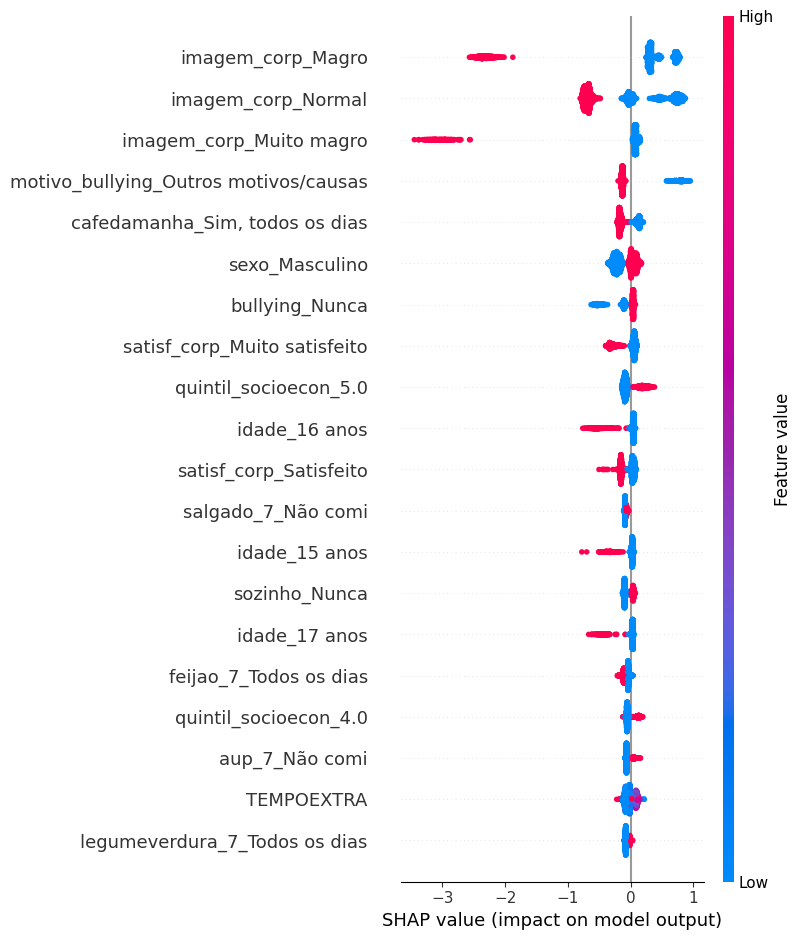

In [ ]:
shap.summary_plot(shap_values, X_test)

#CURVA AUROC

In [ ]:
# Obter as previsões de probabilidade para a curva ROC
y_pred_prob = best_model.predict_proba(X_test)[:, 1] # Use 'best_model' instead of 'clf'

In [ ]:
# Calcular a AUC-ROC
from sklearn.metrics import roc_curve, auc # Import the auc function
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print("\nAUC-ROC:", roc_auc)


AUC-ROC: 0.8222390695166063


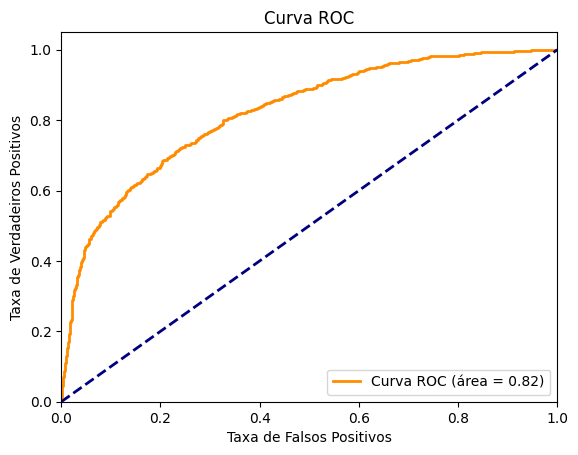

In [ ]:
# Import the necessary module
import matplotlib.pyplot as plt

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#MATRIZES DE CONFUSÃO

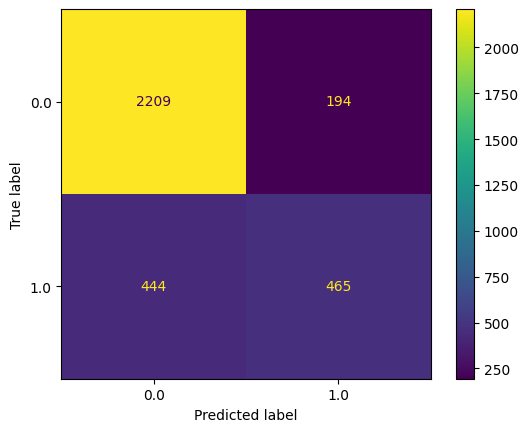

In [ ]:
# Criar a matriz de confusão
y_pred = best_model.predict(X_test)  # Generate predictions using your best model
cm = confusion_matrix(y_test, y_pred)

# Import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Exibir a matriz de confusão usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot() # Add this to display the confusion matrix
plt.show()


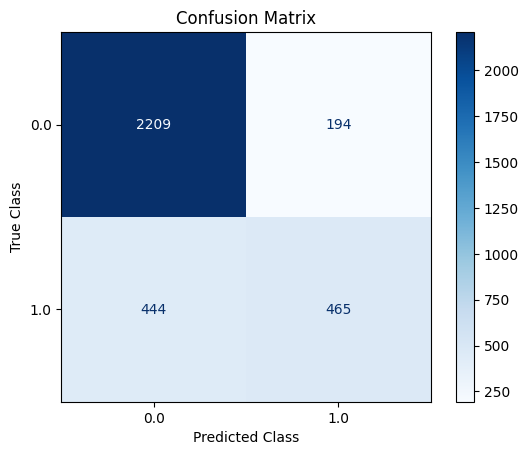

In [ ]:
# Configurando o estilo da plotagem para se assemelhar à imagem fornecida
disp.plot(cmap='Blues', values_format='d')

# Ajustar título, labels e exibir o gráfico
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
